# **SIMULATING (FINANCIAL) DATA**
---
<img src="../Imperial_logo.png" align = "left" width=200>
<br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Introduction

A **random number generator** is a device that generates numbers or symbols that cannot be reasonably predicted better than by a random chance.

They can be true **hardware random number generators**, generating genuinely random numbers, or pseudorandom number generators. 
The former are fundamentally more accurate, but are harder to build; examples thereof are based on microscopic phenomena such as thermal noise, or quantum physics.
The latter are algorithms generating numbers whose properties approximate those of truly random numbers.

## Coin tosses

In [2]:
import random

In [3]:
random.randint(0, 1)

0

In [4]:
[random.randint(0, 1) for _ in range(10)]

[1, 0, 0, 0, 1, 0, 0, 1, 1, 0]

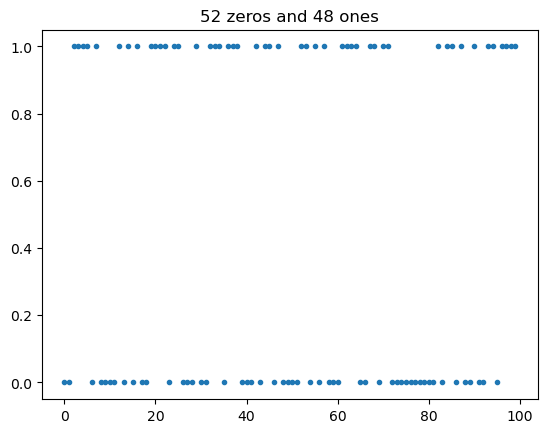

In [11]:
n = 100
random_data = np.array([random.randint(0, 1) for _ in range(n)])
plt.plot(range(n), random_data, '.')
plt.title("%s zeros and %s ones" %(str(n-np.sum(random_data)), str(np.sum(random_data))))
plt.show()

## The uniform random variable

In [12]:
import scipy.stats

In [15]:
xx = np.linspace(scipy.stats.uniform.ppf(0.01),scipy.stats.uniform.ppf(0.99), 100)

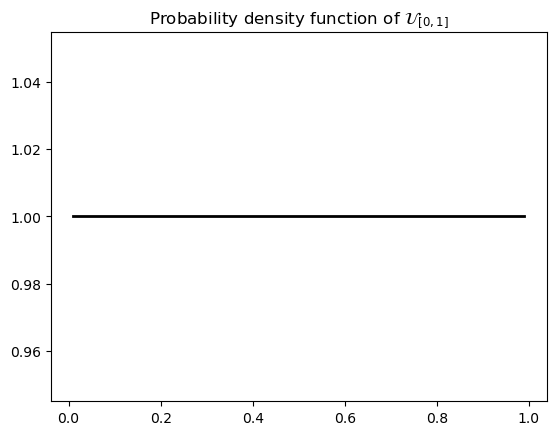

In [16]:
plt.plot(xx, scipy.stats.uniform.pdf(xx), 'k-', lw=2, label='pdf')
plt.title("Probability density function of $\mathcal{U}_{[0,1]}$")
plt.show()

If $X \sim \mathcal{U}_{[a, b]}$, then
$$
\mathbb{E}[X] = \frac{a+b}{2}
\qquad\text{and}\qquad
\mathbb{V}[X] = \frac{(b-a)^2}{12}
$$

In [17]:
np.random.uniform()

0.3538596621183253

In [18]:
np.random.uniform(size=10)

array([9.70181145e-01, 7.92865913e-01, 8.13074834e-01, 7.03542459e-02,
       3.36391400e-02, 8.21757140e-01, 2.71393267e-04, 8.59935936e-01,
       5.98320739e-01, 1.79420679e-01])

Let us generate some more of these...

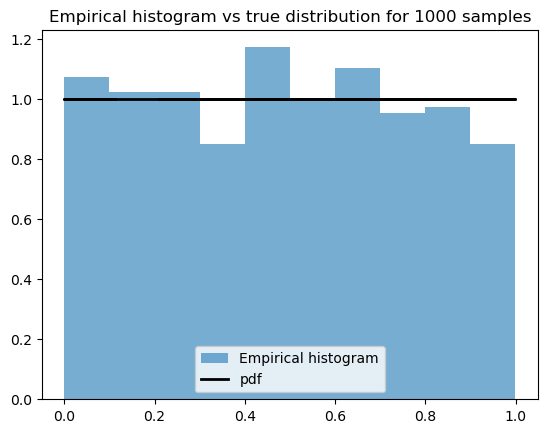

In [28]:
N = 1000
variates = np.random.uniform(size=N)
plt.hist(variates, density=True, histtype='stepfilled', alpha=0.6, label='Empirical histogram')
plt.plot(variates, scipy.stats.uniform.pdf(variates), 'k-', lw=2, label='pdf')
plt.legend(loc="best")
plt.title("Empirical histogram vs true distribution for %s samples" %str(N))
plt.show()

#### Exercise

Generate 100,000 $\text{Uniform}[a, b]$ random variates for $a = -1$, $b = 3$. Confirm that their mean and variance are as expected.

## Random seed

One issue when working with pseudorandom data is the lack of **reproducibility**:
When computing the random variates, we obtain different sequences. 

Even though they should have similar statistical properties, the difference may be enough to 'break' the results.

*Example:* a neural network, with weights and biases initialised to pseudorandom numbers, may calibrate well for some pseudorandom sequences and fail to calibrate for others.

In fact, pseudorandom sequences are (complex but deterministic) functions of the **random seed**, usually initialised using the system's clock.

*Popular choice: 42 (The Hitchhiker's Guide to the Galaxy, by Douglas Adams)*

In [41]:
np.random.seed(42)

#### Example

In [42]:
np.random.uniform(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [43]:
np.random.seed(42)
np.random.uniform(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

## Normal (Gaussian) random variates

The Gaussian distribution, because of the **Central Limit Theorem (CLT)**, is ubiquitous, especially in finance.

If $X\sim\mathcal{N}(\mu, \sigma^2)$, then
$$
\mathbb{E}[X] = \mu
\qquad\text{and}\qquad
\mathbb{V}[X] = \sigma^2.
$$

#### Exercise

On the same set of axes, plot the PDFs of
* $\text{Normal}(\mu = 0, \sigma^2=0.2)$,
* $\text{Normal}(\mu = 0, \sigma^2=1)$,
* $\text{Normal}(\mu = 0, \sigma^2=5)$,
* $\text{Normal}(\mu = -2, \sigma^2=0.5)$.

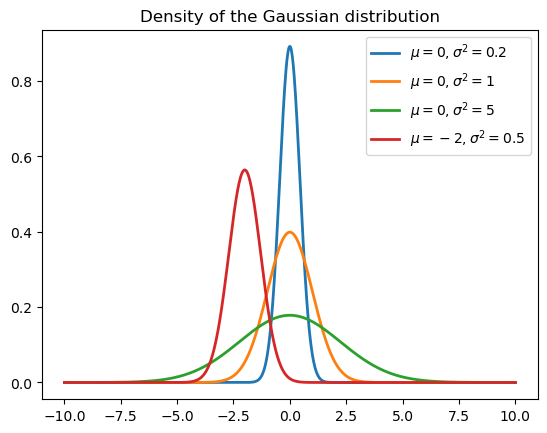

In [45]:
xx = np.linspace(-10., 10., 1000)
X = scipy.stats.norm(loc=0., scale=np.sqrt(.2))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=0.2$')
X = scipy.stats.norm(loc=0., scale=np.sqrt(1.))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=1$')
X = scipy.stats.norm(loc=0., scale=np.sqrt(5.))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=0, \sigma^2=5$')
X = scipy.stats.norm(loc=-2., scale=np.sqrt(.5))
plt.plot(xx, X.pdf(xx), '-', lw=2, label='$\mu=-2, \sigma^2=0.5$')
plt.legend(loc="best")
plt.title("Density of the Gaussian distribution")
plt.show()

## Lindeberg&ndash;L&eacute;vy Central Limit Theorem

Let $\{X_1, \ldots, X_n\}$ be a sequence of iid. random variables with $\mathbb{E}[X_i] = \mu$ and $\mathbb{V}[X_i] = \sigma^2 < \infty$ and
$$
S_n := \frac{X_1 + \ldots + X_n}{n}.
$$

**Law of large numbers:** $S_n)_{n\geq 1}$ converges in probability and almost surely to $\mu$ as $n \uparrow \infty$, and 
$$
\frac{\sqrt{n}}{\sigma}(S_n - \mu) \overset{distribution}{\longrightarrow} \mathcal{N}(0, 1).
$$

#### Exercise

Write a function `generate_gaussian_clt(n, nbsamples)` that generates `nbsamples` from an (approximate) Gaussian distribution using the law of large numbers with `n`.

Confirm that the mean and variance are as expected. 

Plot a histogram and confirm that it looks roughly Normal.

## The Box&ndash;Muller transform
George Box (1919 – 2013, British statistician) and Mervin Muller (1928 – 2018, American computer scientist)

Suppose $U_1$ and $U_2$ are independent samples chosen from the uniform distribution on the unit interval $[0, 1]$. Let
$$Z_0 = \cos(\Theta) = \sqrt{-2\ln U_1}\cos(2\pi U_2),$$
$$Z_1 = \sin(\Theta) = \sqrt{-2\ln U_1}\sin(2\pi U_2).$$
Then $Z_0$ and $Z_1$ are independent Normal random variables with mean zero and variance one.

#### Exercise
*Prove the above statement.*

#### Exercise
*Write a function `box_muller` that generates $Z_0$ and $Z_1$.*

## The Cholesky decomposition

The Cholesky decomposition of a symmetric positive-definite matrix $\mathbf{A}$ is a decomposition of the form
$$\mathbf{A} = \mathbf{L}\mathbf{L}^\intercal,$$
where $\mathbf{L}$ is a lower triangular matrix.

This can be implemented with `numpy.linalg.cholesky`.

*Example:* 
Let $\mathbf{\Sigma} = \mathbf{L}\mathbf{L}^\intercal \in \mathbb{R}^{n \times n}$ be a covariance matrix (i.e. a symmetric positive-definite matrix). Let $\mathbf{X} \in \mathbb{R}^n$ be a random vector. Let $\mathbf{Y} = \mathbf{L}\mathbf{X}$.

Then
$$\mathbb{V}[\mathbf{Y}] = \mathbb{V}[\mathbf{L}\mathbf{X}] = \mathbf{L}\mathbb{V}[\mathbf{X}]\mathbf{L}^\intercal.$$

In particular, if $\mathbf{X} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}_n)$, then $\mathbf{Y} \sim \mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$.

*We can use the Cholesky decomposition to produce from uncorrelated standard Normal variates normal variates with any given variance&ndash;covariance structure.*

#### Exercise

If the covariance matrix is
$$\begin{pmatrix} 25 & -7.5 \\ -7.5 & 9 \end{pmatrix},$$
what are the variances and standard deviations of the two variables and what is the correlation between them?

#### Exercise

- Write a function `multivariate_normal` that generates $n$ Normal random vectors with a given covariance matrix $\mathbf{\Sigma}$. The dimensionality of the normal random vectors is given by the size of $\mathbf{\Sigma}$.

- Generate 10,000 two-dimensional random vectors with the covariance matrix
$$\begin{pmatrix} 25 & -7.5 \\ -7.5 & 9 \end{pmatrix}.$$

- Confirm that the generated data has the right covariance structure.

- Plot the results.

- Produce a histogram for each of the two dimensions.

#### *Note*
We have shown how Cholesky decomposition can be used to create correlated normal random variates from uncorrelated normal random variates. 
In `python`, we can use `numpy.random.multivariate_normal` directly:

In [46]:
variates = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[25., -7.5], [-7.5, 9.]],
    size=10000)

In [47]:
print("Shape: ", np.shape(variates))
print("Covariance matrix: ", np.cov(variates.T))

Shape:  (10000, 2)
Covariance matrix:  [[25.5772291  -7.71181317]
 [-7.71181317  8.98345005]]


## Random walk

For $n \in \mathbb{N}^*$, let
\begin{equation*}
X_n = \left\{
        \begin{array}{ll}
          +1, & \hbox{with probability $\frac{1}{2}$,} \\
          -1, & \hbox{with probability $\frac{1}{2}$,}
        \end{array}
      \right.
\end{equation*}
thus each $X_n$ is a Bernoulli random variable.

#### Exercise

*Compute the mean and the variance of $X_n$ for each n.*

Let $Y_0 := 0$ and, for $n \in \mathbb{N}^*$, let
\begin{equation*}
Y_n := \sum_{i=1}^n X_i.
\end{equation*}

The process $(Y_n)_{n\geq 0}$ is a **symmetric random walk**.

For a sequence of non-negative integers $0 = i_0 < i_1 < \ldots < i_m$, $m \in \mathbb{N}^*$, 
the increments
\begin{equation*}
Y_{i_{j+1}} - Y_{i_j} = \sum_{i = i_j + 1}^{i_{j+1}} X_i,
\end{equation*}
for $j \in \{0, 1, \ldots, m - 1\}$, are independent random variables, and

\begin{align*}
\mathbb{E}[Y_{i_{j+1}} - Y_{i_j}] & = \mathbb{E}\left[\sum_{i = i_j + 1}^{i_{j+1}} X_i\right] = \sum_{i = i_j + 1}^{i_{j+1}} \mathbb{E}[X_i] = \sum_{i = i_j + 1}^{i_{j+1}} 0 = 0,\\
\mathbb{V}[Y_{i_{j+1}} - Y_{i_j}] & = \mathbb{V}\left[\sum_{i = i_j + 1}^{i_{j+1}} X_i\right] = \sum_{i = i_j + 1}^{i_{j+1}} \mathbb{V}[X_i] = \sum_{i = i_j + 1}^{i_{j+1}} 1 = i_{j+1} - i_j.
\end{align*}

Furthermore, for each $n \in \mathbb{N}^*$,
\begin{equation*}
\mathbb{E}[Y_n] = 0, \quad\text{and}\quad \mathbb{V}[Y_n] = n.
\end{equation*}

For a given $N \in \mathbb{N}^*$, define the scaled symmetric random walk:
\begin{equation*}
Z_t^{(N)} := \frac{1}{\sqrt{N}} Y_{Nt}
\end{equation*}
for all $t \in \left\{0, \frac{1}{N}, \frac{2}{N}, \ldots, \frac{N}{N}, \frac{N+1}{N}, \ldots\right\} =: T^{(N)}$, i.e. such $t$ that make $Nt$ a nonnegative integer, ensuring that $Y_{Nt}$ is well defined.

For this process, for $s, t \in T^{(N)}$, $s \leq t$,
\begin{equation*}
\mathbb{E}\left[Z_t^{(N)} - Z_s^{(N)}\right] = 0, \quad \mathbb{V}\left[Z_t^{(N)} - Z_s^{(N)}\right] = t - s,
\end{equation*}
and in particular (setting $s=0$)
\begin{equation*}
\mathbb{E}\left[Z_t^{(N)}\right] = 0, \quad \mathbb{V}\left[Z_t^{(N)}\right] = t.
\end{equation*}

#### Exercise

*Simulate $Z_t^{(N)}$ over $t \in [0, 1]$ for $N \in \{5, 1000, 100000\}$.*

### Time interpolation

We can turn the discrete-time process $Z^{(N)}$ into a continuous-time stochastic process by linear interpolation: for $t \in [0, +\infty)$, define
$$
\widehat{W}_t^{(N)} := Z_{\frac{n}{N}}^{(N)} + \left(t - \frac{n}{N}\right) \left[Z_{\frac{n+1}{N}}^{(N)} - Z_{\frac{n}{N}}^{(N)}\right],
$$
where $n \in \mathbb{N}^0$ is such that $\frac{n}{N} \leq t < \frac{n+1}{N}$ (clearly it is unique, so $\widehat{W}_t^{(N)}$ is well defined).

**Note:** One can prove, using the Central Limit Theorem that, for $s, t \in [0, +\infty)$, $s \leq t$, the distribution of $\widehat{W}_t^{(N)} - \hat{W}_s^{(N)}$ approaches normal with mean 0 and variance $t - s$ as $N \uparrow +\infty$.
In this limit, the process $\lim_{N \uparrow +\infty}\widehat{W}^{(N)}$ becomes a **Brownian motion**.